In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [22]:
#Getting data 
#The data can be downloaded from the link:https://www.kaggle.com/dalpozz/creditcardfraud/downloads/creditcardfraud.zip
data=pd.read_csv('creditcard.csv')

In [3]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


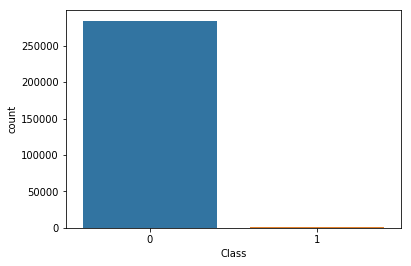

In [4]:
sns.countplot('Class',data=data)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [6]:
data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

**Firstly we will make some transformations on the data,more specifically on the Amount column so as to bring it in line with the anomalized features. **For this,we wiil be using the StandardScaler Library and then after that we will be firstly breaking down the data and separate them as Feature_Variables and Target.


In [7]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
data['Normalized_Amount']=sc.fit_transform(data['Amount'].reshape(-1,1))
data=data.drop(['Time','Amount'],axis=1)
data.head()


/home/sk/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:3: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  This is separate from the ipykernel package so we can avoid doing imports until


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,Normalized_Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


Now we can see that in from the countplot as well as the value_counts function that the data is imbalanced because we can see that in the target variables that there are only 492 Class 1 entries and 284315 Class 0 entries, so we have to balance the data so that predictive modelling can be done. 
But before doing that we have to implement the fit transform on the Amount.

**Now the bigger problem we are facing is that the data is skewed and even if we want to apply and Predictive Modelling, it won't produce any fruitful results.Now, as we have seen that the data is imbalanced and the predictive modeling approach will consider the Class 1 results to be outliers because they are very less in number,hence it will try to produe results for one class only and neglecting other class altogether.**

There can be many approached such as Undersampling, oversampling, SMOTE and Algorithmic Ensemble Techniques.
- Undersampling - In this case we take 10% samples from the Non-Fraud instances anf combine with the Fraud instances.The main advantage of this approach is that it improves the Run time by reducing the number of training examples.
- Oversampling - In this approach,we increase the number of instances in minority class by randomly replicating them in order to present a higher proportion of minority class in the sample.
- SMOTE- In this approach, we try to avoid overfitting which occurs when exact replicas of minority instances are added to the dataset.So,a subset is taken from minority set and then the new synthetic similar instances are create.These instances are added to the original dataset.SMOTE is a combination of Undersampling and Oversampling but it reduces the disadvantages of replicating the dataset.
- In this scnerio, we will be using the Undersampling technique such that we create the dataset by 50/50 ratio.This will be done by randomly selecting 'x' number of samples from the majority class where 'x' is total number of samples in the minority class.

**For further knowledge on how to handle the imbalanced data for predictive modeling,you can visit the link:https://www.analyticsvidhya.com/blog/2017/03/imbalanced-classification-problem/**

*Resampling data into features and targets datasets*

In [9]:
x=data.ix[:,data.columns!='Class']
y=data.ix[:,data.columns=='Class']

In [10]:
print(x.head())
print(y.head())

         V1        V2        V3        V4        V5        V6        V7  \
0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9       V10        ...               V20       V21  \
0  0.098698  0.363787  0.090794        ...          0.251412 -0.018307   
1  0.085102 -0.255425 -0.166974        ...         -0.069083 -0.225775   
2  0.247676 -1.514654  0.207643        ...          0.524980  0.247998   
3  0.377436 -1.387024 -0.054952        ...         -0.208038 -0.108300   
4 -0.270533  0.817739  0.753074        ...          0.408542 -0.009431   

        V22       V23       V24       V25       V26       V27       V28  \
0  0.277838 -0.110474  0.0669

In [11]:
#Counting the number of fraud records
number_fraud_records=len(data[data['Class']==1])

#Indices of the fraud records
fraud_indices=np.array(data[data['Class']==1].index)

#Indices of Normal records i.e. the records that are not faulty
normal_indices=data[data['Class']==0].index

#Out of the normal_indices,randomly select the 'x' records randomly
random_normal_indices=np.random.choice(normal_indices,size=number_fraud_records,replace=False)
random_normal_indices=np.array(random_normal_indices)

#Appending the 2 indices
under_sample_indices=np.concatenate([fraud_indices,random_normal_indices])


In [13]:
#Under sampled data
under_sample_data=data.iloc[under_sample_indices,:]
total=len(under_sample_data)
class0=len(under_sample_data[under_sample_data['Class']==0])
class1=len(under_sample_data[under_sample_data['Class']==1])
#Unders ampled features
x_sample=under_sample_data.ix[:,under_sample_data.columns!='Class']
#Under sampled targets
y_sample=under_sample_data.ix[:,under_sample_data.columns=='Class']

/home/sk/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:7: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  import sys


In [16]:
print("Percentage of normal transactions: ",float(class0)/(total))
print("Percentage of fraud transactions: ",float(class1)/(total))
print("Total number of transactions: ",total)

('Percentage of normal transactions: ', 0.5)
('Percentage of fraud transactions: ', 0.5)
('Total number of transactions: ', 984)


In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=1)
print("Number of transactions in training set:",len(X_train))
print("Number of transactions in testing set:",len(X_test))
print("Total number of transactions are:",len(X_train)+len(X_test))

print("Undersampled data-->>>")
X_train_undersample, X_test_undersample, y_train_undersample, y_test_undersample = train_test_split(x_sample, y_sample, test_size=0.33, random_state=1)
print("Number of transactions in training set:",len(X_train_undersample))
print("Number of transactions in testing set:",len(X_test_undersample))
print("Total number of transactions are:",len(X_train_undersample)+len(X_test_undersample))

('Number of transactions in training set:', 190820)
('Number of transactions in testing set:', 93987)
('Total number of transactions are:', 284807)
Undersampled data-->>>
('Number of transactions in training set:', 659)
('Number of transactions in testing set:', 325)
('Total number of transactions are:', 984)


In [15]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score
from sklearn.model_selection import GridSearchCV

In [16]:
#Fitting an SVC classifier on the undersampled dataset.
classifier= SVC(C= 1, kernel= 'rbf', random_state= 0)
classifier.fit(X_train_undersample, y_train_undersample)

/home/sk/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

We are very interested in the recall score, because that is the metric that will help us try to capture the most fraudulent transactions. If you think how Accuracy, Precision and Recall work for a confusion matrix, recall would be the most interesting:

   - Accuracy = (TP+TN)/total
   - Precision = TP/(TP+FP)
   - Recall = TP/(TP+FN)


In [17]:
#Predicting on X_test_undersample
y_predict_undersample=classifier.predict(X_test_undersample)

In [18]:
confusion_matrix1=confusion_matrix(y_test_undersample,y_predict_undersample)
print(confusion_matrix1)

[[163   6]
 [ 12 144]]


In [22]:
print'The Accuracy Score of SVC Model on Undersampled data is:',accuracy_score(y_test_undersample,y_predict_undersample)*100,'%'
print'The Recall Score of SVC Model on Undersampled data is:',recall_score(y_test_undersample,y_predict_undersample)*100,'%'

The Accuracy Score of SVC Model on Undersampled data is: 94.1538461538 %
The Recall Score of SVC Model on Undersampled data is: 92.3076923077 %


In [19]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X=X_train_undersample, y = y_train_undersample, cv = 10)
mean_accuracy= accuracies.mean()*100
std_accuracy= accuracies.std()*100
print("The mean accuracy in %: ", accuracies.mean()*100)
print("The standard deviation in % ", accuracies.std()*100)

('The mean accuracy in %: ', 91.803012907490512)
('The standard deviation in % ', 1.5666735820764242)


In [ ]:
#parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10,100,1000],'gamma':[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}
#grid_search = GridSearchCV(estimator = classifier,param_grid = parameters,scoring = 'accuracy',cv = 10,n_jobs = -1)
#grid_search = grid_search.fit(X_train_undersample, y_train_undersample)
print("The Best Score is :",grid_search.best_score_)

In [21]:
parameters = [{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
              {'C': [1, 10, 100, 1000], 'kernel': ['rbf'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}]

grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search = grid_search.fit(X_train_undersample, y_train_undersample)
best_accuracy = grid_search.best_score_
print("The best accuracy using gridSearch is", best_accuracy)

best_parameters = grid_search.best_params_
print("The best parameters for using this model is", best_parameters)

('The best accuracy using gridSearch is', 0.92867981790591803)
('The best parameters for using this model is', {'kernel': 'linear', 'C': 10})
